In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Drinks

In [2]:
drinks = pd.read_csv("Drinks.csv")
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,NaN
1,Albania,89,132,54,NaN
2,Algeria,25,0,14,NaN
3,Andorra,245,138,312,NaN
4,Angola,217,57,45,NaN


In [3]:
drinks.dtypes

country                          object
beer_servings                    object
spirit_servings                  object
wine_servings                    object
total_litres_of_pure_alcohol    float64
dtype: object

In [4]:
drinks['beer_servings'].unique()

array(['0', '89', '25', '245', '217', '102', '193', '21', '261', '279',
       '122', '42', '143', '142', '295', '263', '34', '23', '167', '76',
       '173', '31', '231', '88', '144', '57', '147', '240', '17', '15',
       '130', '79', '159', '1', '149', '37', '230', '93', '192', '361',
       '224', '52', '32', '162', '6', '92', '18', '20', '77', '127',
       '347', '8', '346', '133', '199', '53', '9', '28', '69', '234',
       '233', '5', '313', '63', '85', '82', '124', '58', '62', '281',
       '19', '343', '236', '?', '26', '13', '98', '238', '109', '12',
       '47', '376', '49', '251', '203', '78', '3', '188', '169', '22',
       '306', '285', '44', '213', '163', '71', '194', '297', '247', '43',
       '105', '56', '283', '157', '60', '196', '270', '225', '140', '284',
       '16', '171', '120', '128', '90', '152', '185', '2', '36', '99',
       '197', '51', '45', '206', '219', '115', '249', '333', '111', '64'],
      dtype=object)

In [5]:
#'?' to NA
drinks.replace('?',np.nan, inplace=True)

In [6]:
drinks=drinks.astype({'beer_servings':'float', 'spirit_servings': 'float', 'wine_servings':'float'})

In [7]:
# calculating 'total_litres_of_pure_alcohol'

drinks['total_litres_of_pure_alcohol'] = drinks['beer_servings']*0.0295*12*0.05 + drinks['spirit_servings']*0.0295*1.5*0.4 + drinks['wine_servings']*0.0295*5*0.12

In [8]:
# check for missing values
drinks[drinks.isna().any(axis=1)]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
11,Bahamas,122.0,176.0,NaN,NaN
46,Denmark,224.0,NaN,278.0,NaN
99,Macedonia,NaN,27.0,86.0,NaN


I decided to drop the missing values, because they are definitely not 0. I could interpolate them, but the result might be misleading, because it's possible, that they have a disproportionate consumption in the missing category. Also, we only lose 3 observations, so it's not a big deal.

In [9]:
drinks.dropna(inplace=True)

In [10]:
drinks.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,190.000000,190.000000,190.000000,190.000000
mean,105.457895,80.778947,48.047368,4.146831
std,101.572690,88.626221,78.530841,3.704184
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,0.796500
50%,70.000000,55.500000,8.000000,2.955900
75%,187.250000,127.500000,58.250000,6.907425
max,376.000000,438.000000,370.000000,12.301500


Looks like there are zero values. Let's take a look at them:

In [11]:
drinks[drinks.total_litres_of_pure_alcohol == 0]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0.0,0.0,0.0,0.0
13,Bangladesh,0.0,0.0,0.0,0.0
78,Iran,0.0,0.0,0.0,0.0
89,Kuwait,0.0,0.0,0.0,0.0
96,Libya,0.0,0.0,0.0,0.0
103,Maldives,0.0,0.0,0.0,0.0
106,Marshall Islands,0.0,0.0,0.0,0.0
107,Mauritania,0.0,0.0,0.0,0.0
112,Monaco,0.0,0.0,0.0,0.0
127,North Korea,0.0,0.0,0.0,0.0


I think it's very safe to assume, that these values aren't true, meaning either the data is incorrect, or the reported numbers are false. There is an argument for keeping them, as these numbers maybe close to 0, but I'm choosing to drop them as well.

In [12]:
drinks=drinks[drinks.total_litres_of_pure_alcohol != 0]

In [13]:
drinks.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,177.000000,177.000000,177.000000,177.000000
mean,113.203390,86.711864,51.576271,4.451400
std,100.981509,88.979770,80.246963,3.656637
min,0.000000,0.000000,0.000000,0.088500
25%,25.000000,11.000000,2.000000,0.991200
50%,78.000000,65.000000,9.000000,3.823200
75%,193.000000,133.000000,71.000000,7.044600
max,376.000000,438.000000,370.000000,12.301500


The next plot displays the pure alcohol consumption of each country from the drinks table (for better visibility, only every fifth country's name is displayed on the Y-axis).

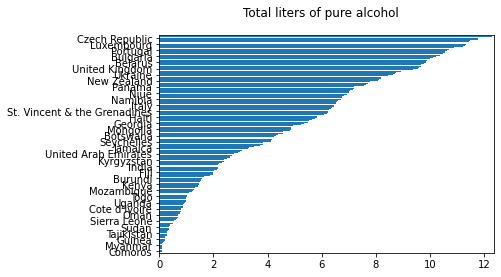

In [14]:
import matplotlib.ticker as plticker

drinks_sorted = drinks.sort_values('total_litres_of_pure_alcohol', ascending=True)

plt.rcParams["figure.figsize"] = (15,10)
fig, ax = plt.subplots(1,1)
ax.barh(drinks_sorted['country'], drinks_sorted['total_litres_of_pure_alcohol'])
loc = plticker.MultipleLocator(base=5.0) # this locator puts ticks at regular intervals
ax.yaxis.set_major_locator(loc)

plt.suptitle('Total liters of pure alcohol')

plt.margins(0.005)
plt.show()

For the next plot I created 5 equal sized bins. Each bin has a range of 2.5l and contains all the countries falling in that range:

In [15]:
drinks_bin = pd.DataFrame(pd.cut(drinks_sorted.total_litres_of_pure_alcohol, bins=[0, 2.5, 5, 7.5, 10, 12.5],
                                labels=['0 - 2.5','2.5 - 5', '5 - 7.5', '7.5 - 10', '10+']))

In [16]:
drinks_bin2 = drinks_bin.merge(drinks, left_on=drinks_bin.index, 
                 right_on=drinks.index).groupby('total_litres_of_pure_alcohol_x').agg({'country':'count', 
                                 'total_litres_of_pure_alcohol_y': 'sum'}).reset_index().rename(
    columns={'total_litres_of_pure_alcohol_x': 'bins', 'country':'count'})

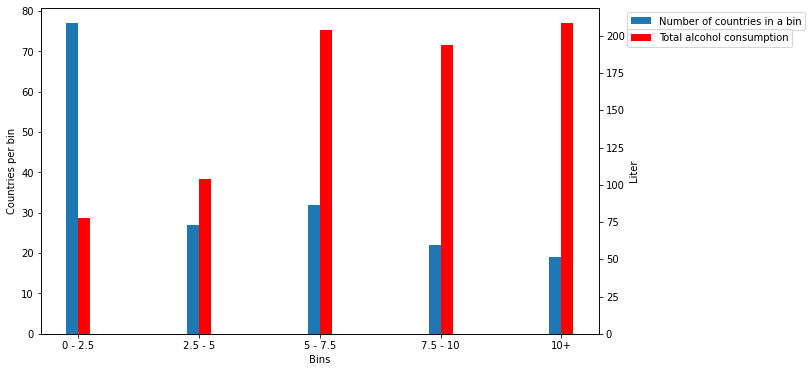

In [17]:
plt.rcParams["figure.figsize"] = (10,6)
fig, ax1 = plt.subplots()

ax1.set_xlabel('Bins')
ax1.bar(drinks_bin2.bins, drinks_bin2['count'], align='edge',  width=-0.1, label='Number of countries in a bin')

ax1.set_ylabel('Countries per bin')
ax1.legend(loc=(1.05,0.93))

ax2 = ax1.twinx()

ax2.bar(drinks_bin2.bins, drinks_bin2['total_litres_of_pure_alcohol_y'], align='edge', color='red', width=0.1, 
        label='Total alcohol consumption')
ax2.set_ylabel('Liter')
ax2.legend(loc=(1.05,0.88))

#handles, labels = ax.get_legend_handles_labels()
#fig.legend(handles, labels, loc = (0.5, 0.5), ncol=2)
plt.show()

Most of the alcohol consumption comes from the 10+ bin, even though it contains the fewest of countries.

## Read, understand and prepare LifeExpectancy.csv (use only last available life expectancy information)


In [18]:
life_exp = pd.read_csv("LifeExpectancy.csv")
life_exp.head(30)

,GhoCode,GhoDisplay,PublishStateCode,PublishStateDisplay,YearCode,YearDisplay,RegionCode,RegionDisplay,WorldBankIncomeGroupGroupCode,WorldBankIncomeGroupDisplay,CountryCode,CountryDisplay,SexCode,SexDisplay,DisplayValue,Numeric
0,WHOSIS_000001,Life expectancy at birth (years),PUBLISHED,Published,2013,2013,EMR,Eastern Mediterranean,NaN,NaN,AFG,Afghanistan,BTSX,Both sexes,61,61.25205
1,WHOSIS_000001,Life expectancy at birth (years),PUBLISHED,Published,2013,2013,EMR,Eastern Mediterranean,NaN,NaN,AFG,Afghanistan,FMLE,Female,62,61.97733
2,WHOSIS_000001,Life expectancy at birth (years),PUBLISHED,Published,2013,2013,EMR,Eastern Mediterranean,NaN,NaN,AFG,Afghanistan,MLE,Male,61,60.51228
3,WHOSIS_000001,Life expectancy at birth (years),PUBLISHED,Published,2012,2012,EMR,Eastern Mediterranean,WB_LI,Low_income,AFG,Afghanistan,BTSX,Both sexes,60,60.00000
4,WHOSIS_000001,Life expectancy at birth (years),PUBLISHED,Published,2012,2012,EMR,Eastern Mediterranean,WB_LI,Low_income,AFG,Afghanistan,FMLE,Female,61,61.00000
5,WHOSIS_000001,Life expectancy at birth (years),PUBLISHED,Published,2012,2012,EMR,Eastern Mediterranean,WB_LI,Low_income,AFG,Afghanistan,MLE,Male,58,58.00000
6,WHOSIS_000001,Life expectancy at birth (years),PUBLISHED,Published,2000,2000,EMR,Eastern Mediterranean,WB_LI,Low_income,AFG,Afghanistan,BTSX,Both sexes,55,55.00000
7,WHOSIS_000001,Life expectancy at birth (years),PUBLISHED,Published,2000,2000,EMR,Eastern Mediterranean,WB_LI,Low_income,AFG,Afghanistan,FMLE,Female,56,56.00000
8,WHOSIS_000001,Life expectancy at birth (years),PUBLISHED,Published,2000,2000,EMR,Eastern Mediterranean,WB_LI,Low_income,AFG,Afghanistan,MLE,Male,54,54.00000
9,WHOSIS_000001,Life expectancy at birth (years),PUBLISHED,Published,1990,1990,EMR,Eastern Mediterranean,WB_LI,Low_income,AFG,Afghanistan,BTSX,Both sexes,49,49.00000


In [19]:
life_exp.dtypes

GhoCode                           object
GhoDisplay                        object
PublishStateCode                  object
PublishStateDisplay               object
YearCode                           int64
YearDisplay                        int64
RegionCode                        object
RegionDisplay                     object
WorldBankIncomeGroupGroupCode     object
WorldBankIncomeGroupDisplay       object
CountryCode                       object
CountryDisplay                    object
SexCode                           object
SexDisplay                        object
DisplayValue                       int64
Numeric                          float64
dtype: object

The 'Numeric' column contains the life expectancy numbers. 

In [20]:
life_exp.describe()

,YearCode,YearDisplay,DisplayValue,Numeric
count,6408.000000,6408.000000,6408.000000,6408.000000
mean,2005.000936,2005.000936,48.143571,48.145528
std,8.861084,8.861084,23.774807,23.775598
min,1990.000000,1990.000000,11.000000,11.000000
25%,2000.000000,2000.000000,20.000000,20.000000
50%,2012.000000,2012.000000,57.000000,56.979710
75%,2013.000000,2013.000000,69.000000,69.000000
max,2013.000000,2013.000000,87.000000,87.154570


The lowest value is apparently 11, which looks like an error at first glance, but there is a type of life expectancy (life exp. at age 60) which is a much lower number, so maybe that's the reason.

In [21]:
life_exp1 = life_exp[life_exp.GhoDisplay == 'Life expectancy at birth (years)']
life_exp1.Numeric.describe()

count    2328.000000
mean       68.441379
std        10.051907
min        38.000000
25%        62.000000
50%        70.857895
75%        76.000000
max        87.154570
Name: Numeric, dtype: float64

Now the minimum is 38, which is still very low but possible. I'm going to keep this df, not including the other types of life expectancy, as I think this is the most relevant for our purposes.

We saw earlier, that there are values for multiple years. Let's only keep the most recent, which is 2013.

In [22]:
life_exp1 = life_exp1[life_exp1['YearCode'] == life_exp1['YearCode'].unique().max()]

## Merge drinks and lifetime data by country

In [23]:
# let's check if the countries are matching in the two datasets

len(drinks['country'].unique())

177

In [24]:
len(life_exp1['CountryDisplay'].unique())

194

In [25]:
# let's find the differences

countries_all = pd.concat([pd.DataFrame(life_exp['CountryDisplay'].unique()), drinks['country']])

In [26]:
countries_all = pd.concat([drinks['country'], pd.DataFrame(life_exp['CountryDisplay'].unique())])
countries_all.columns = ['country']

In [27]:
country_all2=countries_all.groupby('country')['country'].count()

In [28]:
country_all2[country_all2 < 2].index.tolist()

['Afghanistan',
 'Antigua & Barbuda',
 'Antigua and Barbuda',
 'Bahamas',
 'Bangladesh',
 'Bolivia',
 'Bolivia (Plurinational State of)',
 'Bosnia and Herzegovina',
 'Bosnia-Herzegovina',
 'Brunei',
 'Brunei Darussalam',
 "Cote d'Ivoire",
 "Côte d'Ivoire",
 'DR Congo',
 "Democratic People's Republic of Korea",
 'Democratic Republic of the Congo',
 'Denmark',
 'Guinea-Bissau',
 'Guinea_Bissau',
 'Iran (Islamic Republic of)',
 'Kuwait',
 "Lao People's Democratic Republic",
 'Laos',
 'Libya',
 'Maldives',
 'Marshall Islands',
 'Mauritania',
 'Micronesia',
 'Micronesia (Federated States of)',
 'Moldova',
 'Monaco',
 'Pakistan',
 'Republic of Korea',
 'Republic of Moldova',
 'Saint Kitts and Nevis',
 'Saint Lucia',
 'Saint Vincent and the Grenadines',
 'San Marino',
 'Sao Tome & Principe',
 'Sao Tome and Principe',
 'Somalia',
 'South Korea',
 'South Sudan',
 'St. Kitts & Nevis',
 'St. Lucia',
 'St. Vincent & the Grenadines',
 'Syria',
 'Syrian Arab Republic',
 'Tanzania',
 'The former Yugo

Other than the countries we dropped earlier, there are differences due to the same countries having different names in the two dfs. I'm going to try to fix it with fuzzymatcher.

In [29]:
import fuzzymatcher

country_all4 = fuzzymatcher.fuzzy_left_join(drinks, life_exp1, ['country'], ['CountryDisplay'])

In [30]:
country_all4 = country_all4[['country', 'CountryDisplay']]

In [31]:
#pd.set_option('display.max_rows', None)
country_all4

,country,CountryDisplay
0,Albania,Albania
3,Algeria,Algeria
6,Andorra,Andorra
9,Angola,Angola
12,Antigua & Barbuda,Antigua and Barbuda
...,...,...
556,Venezuela,Venezuela (Bolivarian Republic of)
559,Vietnam,NaN
560,Yemen,Yemen
563,Zambia,Zambia


Looks like there are missing values, meaning that the fuzzymatcher didn't find a match for them for whatever reason. Let's check them:

In [32]:
country_tocheck = country_all4[country_all4['CountryDisplay'].isna()]
country_tocheck

,country,CountryDisplay
282,Laos,NaN
493,Syria,NaN
503,Timor-Leste,NaN
549,USA,NaN
559,Vietnam,NaN


We'll get back to these later. Now let's check if the others with a match are in fact the proper matches. I'm doing that by comparing the original country names with the new ones, character for character, for the first ten characters. I'm assuming if the first 10 characters are a match, it is almost certainly the same country:

In [33]:
country_all5 = country_all4[country_all4['CountryDisplay'].notna()]

# let's check if fuzzy matching worked

country_all5['country_okay'] = 0

for i in range(len(country_all5)):
    if (country_all5.iloc[i,0][0:10] == country_all5.iloc[i,1][0:10]):
        country_all5['country_okay'].iloc[i] = 'okay'
    else:
        country_all5['country_okay'].iloc[i] = 'not okay'

/var/folders/n8/4qkbch054_dcrcnsw7khkv340000gn/T/ipykernel_7454/554141571.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_all5['country_okay'] = 0
/var/folders/n8/4qkbch054_dcrcnsw7khkv340000gn/T/ipykernel_7454/554141571.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_all5['country_okay'].iloc[i] = 'okay'
/var/folders/n8/4qkbch054_dcrcnsw7khkv340000gn/T/ipykernel_7454/554141571.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/p

In [34]:
country_all5[country_all5['country_okay'] == 'not okay']

,country,CountryDisplay,country_okay
12,Antigua & Barbuda,Antigua and Barbuda,not okay
51,Bolivia,Bolivia (Plurinational State of),not okay
54,Bosnia-Herzegovina,Bosnia and Herzegovina,not okay
63,Brunei,Brunei Darussalam,not okay
117,Cote d'Ivoire,Côte d'Ivoire,not okay
141,DR Congo,Congo,not okay
213,Guinea-Bissau,Guinea,not okay
325,Moldova,Republic of Moldova,not okay
415,Sao Tome & Principe,Sao Tome and Principe,not okay
448,South Korea,South Sudan,not okay


Aside from some obvious errors (UK and South Korea), most of them look okay. However if I remember correctly, there are multiple Congos and Guineas, so let's make sure the matcher got the right one.

In [35]:
drinks[drinks.country.str.contains('congo', case=False)]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
38,Congo,76.0,1.0,9.0,1.5222
50,DR Congo,32.0,3.0,1.0,0.6372


So fuzzymatcher got the wrong Congo for DR Congo, let's keep this in mind.

In [36]:
drinks[drinks.country.str.contains('guinea', case=False)]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
54,Equatorial Guinea,92.0,0.0,233.0,5.7525
69,Guinea,9.0,0.0,2.0,0.1947
70,Guinea-Bissau,28.0,31.0,21.0,1.4160
133,Papua New Guinea,44.0,39.0,1.0,1.4868


So there are four Guineas. Luckily, we don't have to worry about the other three, because they match the life_exp1 table character for character (for the first 10 characters). In this case as well, fuzzymatcher got the wrong one, let's keep that in mind too.

Now it's time to fix the errors. We already know the names we have to change in the drinks df, the previous line of code helps us to find country names in the life_exp1 df.

Also we have to check if the missing countries are in the life_exp1 df, and if so, add them too.

In [37]:
dict_country={"South Korea": "Republic of Korea", "Guinea-Bissau": "Guinea_Bissau",
              "United Kingdom": "United Kingdom of Great Britain and Northern Ireland", 
              "DR Congo": "Democratic Republic of the Congo'", "Laos": "Lao People's Democratic Republic",
              "Syria": "Syrian Arab Republic", "Timor-Leste": "Timor_Leste", "USA": "United States of America",
              "Vietnam": "Viet Nam"}

In [38]:
drinks["country"].replace(dict_country, inplace=True)

In [39]:
# let's repeat the fuzzy match

country_all6 = fuzzymatcher.fuzzy_left_join(drinks, life_exp1, ['country'], ['CountryDisplay'])
country_all7 = country_all6[['country', 'CountryDisplay']]

# let's check if fuzzy matching worked

country_all7['country_okay'] = 0

for i in range(len(country_all5)):
    if (country_all7.iloc[i,0][0:10] == str(country_all7.iloc[i,1][0:10])):
        country_all7['country_okay'].iloc[i] = 'okay'
    else:
        country_all7['country_okay'].iloc[i] = 'not okay'

/var/folders/n8/4qkbch054_dcrcnsw7khkv340000gn/T/ipykernel_7454/1180779859.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_all7['country_okay'] = 0
/var/folders/n8/4qkbch054_dcrcnsw7khkv340000gn/T/ipykernel_7454/1180779859.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_all7['country_okay'].iloc[i] = 'okay'
/var/folders/n8/4qkbch054_dcrcnsw7khkv340000gn/T/ipykernel_7454/1180779859.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.o

In [40]:
country_all7[country_all7['country_okay'] == 'not okay']

,country,CountryDisplay,country_okay
12,Antigua & Barbuda,Antigua and Barbuda,not okay
51,Bolivia,Bolivia (Plurinational State of),not okay
54,Bosnia-Herzegovina,Bosnia and Herzegovina,not okay
63,Brunei,Brunei Darussalam,not okay
117,Cote d'Ivoire,Côte d'Ivoire,not okay
315,Moldova,Republic of Moldova,not okay
405,Sao Tome & Principe,Sao Tome and Principe,not okay
450,St. Kitts & Nevis,Saint Kitts and Nevis,not okay
453,St. Lucia,Saint Lucia,not okay
456,St. Vincent & the Grenadines,Saint Vincent and the Grenadines,not okay


Looks perfect. Now let's create the merged df.

In [41]:
country_all6.columns

Index(['best_match_score', '__id_left', '__id_right', 'country',
       'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'GhoCode', 'GhoDisplay',
       'PublishStateCode', 'PublishStateDisplay', 'YearCode', 'YearDisplay',
       'RegionCode', 'RegionDisplay', 'WorldBankIncomeGroupGroupCode',
       'WorldBankIncomeGroupDisplay', 'CountryCode', 'CountryDisplay',
       'SexCode', 'SexDisplay', 'DisplayValue', 'Numeric'],
      dtype='object')

In [42]:
# dropping the unnecessary columns

df = country_all6.drop(['best_match_score', '__id_left', '__id_right', 'YearDisplay'], axis=1)

In [43]:
len(df)

177

In [44]:
df.SexDisplay.unique()

array(['Both sexes'], dtype=object)

In [45]:
life_exp1.SexDisplay.unique()

array(['Both sexes', 'Female', 'Male'], dtype=object)

Due to fuzzy matching, we lost the female and male values of life expectancy for each country. Let's get them back, just in case we want to use them later. Now that we have matching country names, we can join again to get them.

In [46]:
df['country'] = df['CountryDisplay']
df.drop('CountryDisplay', axis=1, inplace=True)

In [47]:
df.drop(df.columns[5:], axis=1, inplace=True)

In [48]:
df = df.merge(life_exp1, how='left', left_on='country', right_on='CountryDisplay')

In [49]:
len(df)

531

In [50]:
len(life_exp1)

582

It looks like there is a difference, but we dropped some countries from the drinks df.

In [51]:
drinks_2 = pd.read_csv("Drinks.csv")

In [52]:
len(drinks_2) - len(drinks)

16

We dropped 16 countries. Now let's check if the life_exp df had the same amount of countries as the drinks df.

In [53]:
len(life_exp.CountryDisplay.unique()) - len(drinks_2)

1

In [54]:
len(life_exp1) - len(df) - (len(drinks_2) - len(drinks) + 1)*3

0

There was an extra country, we dropped 2/3 of the rows earlier, so the difference checks out.

## Calculate correlation between expected lifetime and total liters of pure alcohol

In [55]:
# Let's check 'Life expectancy at birth (years)' for both sexes

df_corr = df[df['SexDisplay'] == 'Both sexes']

In [56]:
df_corr['total_litres_of_pure_alcohol'].corr(df_corr['Numeric']).round(2)

0.56

It looks like there is a positive correlation between the pure alcohol consumed per year and the life expectancy at birth, meaning that for every liter of pure alcohol consumed, we can expect the life expectancy to be higher by about half a year (on average).


## Read and prepare CountriesOfTheWorld.xlsx

In [57]:
countries_df = pd.read_excel('CountriesOfTheWorld.xls', skiprows=2)
countries_df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,Country,Region,Population,Area,Pop. Density,Coastline,Net migration,Infant mortality,GDP,Literacy,Phones,Arable,Crops,Other,Birthrate,Deathrate
1,NaN,NaN,NaN,sq. mi.,per sq. mi.,coast/area ratio,NaN,per 1000 births,$ per capita,%,per 1000,%,%,%,NaN,NaN
2,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,47.96,0,23.06,163.07,700,36,3.22,12.13,0.22,87.65,46.6,20.34
3,Albania,EASTERN EUROPE,3581655,28748,124.59,1.26,-4.93,21.52,4500,86.5,71.2,21.09,4.42,74.49,15.11,5.22
4,Algeria,NORTHERN AFRICA,32930091,2381740,13.83,0.04,-0.39,31,6000,70,78.1,3.22,0.25,96.53,17.14,4.61


In [58]:
countries_df.iloc[0,[3,4,5,7,8,9,10,11,12,13]] = countries_df.iloc[0,[3,4,5,7,8,9,10,11,12,13]] + countries_df.iloc[1,[3,4,5,7,8,9,10,11,12,13]]

In [59]:
countries_df.columns = countries_df.iloc[0,]
countries_df.drop([0,1], inplace=True)
countries_df.reset_index(drop=True, inplace=True)
countries_df['Country'] = countries_df['Country'].str.strip()

In [60]:
countries_df.head()

,Country,Region,Population,Areasq. mi.,Pop. Densityper sq. mi.,Coastlinecoast/area ratio,Net migration,Infant mortalityper 1000 births,GDP$ per capita,Literacy%,Phonesper 1000,Arable%,Crops%,Other%,Birthrate,Deathrate
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,47.96,0,23.06,163.07,700,36,3.22,12.13,0.22,87.65,46.6,20.34
1,Albania,EASTERN EUROPE,3581655,28748,124.59,1.26,-4.93,21.52,4500,86.5,71.2,21.09,4.42,74.49,15.11,5.22
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.83,0.04,-0.39,31,6000,70,78.1,3.22,0.25,96.53,17.14,4.61
3,American Samoa,OCEANIA,57794,199,290.42,58.29,-20.71,9.27,8000,97,259.54,10,15,75,22.46,3.27
4,Andorra,WESTERN EUROPE,71201,468,152.14,0,6.6,4.05,19000,100,497.18,2.22,0,97.78,8.71,6.25


In [61]:
countries_df.dtypes

0
Country                            object
Region                             object
Population                         object
Areasq. mi.                        object
Pop. Densityper sq. mi.            object
Coastlinecoast/area ratio          object
Net migration                      object
Infant mortalityper 1000 births    object
GDP$ per capita                    object
Literacy%                          object
Phonesper 1000                     object
Arable%                            object
Crops%                             object
Other%                             object
Birthrate                          object
Deathrate                          object
dtype: object

In [62]:
cols = countries_df.columns.drop(['Country', 'Region'])

# transforming columns to numeric
countries_df[cols] = countries_df[cols].apply(pd.to_numeric, errors='coerce')

In [63]:
countries_df.describe()

,Population,Areasq. mi.,Pop. Densityper sq. mi.,Coastlinecoast/area ratio,Net migration,Infant mortalityper 1000 births,GDP$ per capita,Literacy%,Phonesper 1000,Arable%,Crops%,Other%,Birthrate,Deathrate
count,2.270000e+02,2.270000e+02,227.000000,227.000000,224.000000,224.000000,226.000000,209.000000,223.000000,225.000000,225.000000,225.000000,224.000000,223.000000
mean,2.874028e+07,5.982270e+05,379.042511,21.165330,0.038125,35.506964,9689.823009,82.838278,236.057668,13.797111,4.564222,81.638311,22.114732,9.241345
std,1.178913e+08,1.790282e+06,1660.187541,72.286863,4.889269,35.389899,10049.138513,19.722173,227.992091,13.040402,8.361470,16.140835,11.176716,4.990026
min,7.026000e+03,2.000000e+00,0.030000,0.000000,-20.990000,2.290000,500.000000,17.600000,0.170000,0.000000,0.000000,33.330000,7.290000,2.290000
25%,4.376240e+05,4.647500e+03,29.155000,0.100000,-0.927500,8.150000,1900.000000,70.600000,37.810000,3.220000,0.190000,71.650000,12.672500,5.910000
50%,4.786994e+06,8.660000e+04,78.770000,0.730000,0.000000,21.000000,5550.000000,92.500000,176.150000,10.420000,1.030000,85.700000,18.790000,7.840000
75%,1.749777e+07,4.418110e+05,190.110000,10.345000,0.997500,55.705000,15700.000000,98.000000,389.630000,20.000000,4.440000,95.440000,29.820000,10.605000
max,1.313974e+09,1.707520e+07,16271.500000,870.660000,23.060000,191.190000,55100.000000,100.000000,1035.550000,62.110000,50.680000,100.000000,50.730000,29.740000


## Merge countries of the world data and the previously prepared data (containing total liters of pure alcohol and expected lifetime)

In [64]:
len(countries_df)

227

I decided to merge the world data with the df, that has the life expectancy for females and males as well, so each country has 3 values.

In [65]:
country_all8 = fuzzymatcher.fuzzy_left_join(df, countries_df, ['country'], ['Country'])

In [66]:
country_all8.columns

Index(['best_match_score', '__id_left', '__id_right', 'country',
       'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'GhoCode', 'GhoDisplay',
       'PublishStateCode', 'PublishStateDisplay', 'YearCode', 'YearDisplay',
       'RegionCode', 'RegionDisplay', 'WorldBankIncomeGroupGroupCode',
       'WorldBankIncomeGroupDisplay', 'CountryCode', 'CountryDisplay',
       'SexCode', 'SexDisplay', 'DisplayValue', 'Numeric', 'Country', 'Region',
       'Population', 'Areasq. mi.', 'Pop. Densityper sq. mi.',
       'Coastlinecoast/area ratio', 'Net migration',
       'Infant mortalityper 1000 births', 'GDP$ per capita', 'Literacy%',
       'Phonesper 1000', 'Arable%', 'Crops%', 'Other%', 'Birthrate',
       'Deathrate'],
      dtype='object')

In [67]:
country_all9=country_all8[['country', 'Country']]

In [68]:
# again let's check for missing values

country_tocheck = country_all9[country_all9['Country'].isna()]
country_tocheck.country.unique()

array(['Guinea_Bissau', 'Montenegro', 'Myanmar', 'Russian Federation',
       'Timor_Leste', 'Viet Nam'], dtype=object)

In [69]:
country_all9 = country_all9[country_all9['Country'].notna()]

In [70]:
# let's check if fuzzy matching worked

country_all9['country_okay'] = 0

for i in range(len(country_all9)):
    if (country_all9.iloc[i,0][0:10] == str(country_all9.iloc[i,1][0:10])):
        country_all9['country_okay'].iloc[i] = 'okay'
    else:
        country_all9['country_okay'].iloc[i] = 'not okay'

/var/folders/n8/4qkbch054_dcrcnsw7khkv340000gn/T/ipykernel_7454/2557796553.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_all9['country_okay'].iloc[i] = 'okay'


In [71]:
country_all9[country_all9['country_okay'] == 'not okay'].groupby(['country','Country']).count()

,,country_okay
country,Country,
Antigua and Barbuda,Antigua & Barbuda,3
Bolivia (Plurinational State of),Bolivia,3
Bosnia and Herzegovina,Bosnia & Herzegovina,3
Brunei Darussalam,Brunei,3
Cabo Verde,Cape Verde,3
Congo,"Congo, Dem. Rep.",3
Côte d'Ivoire,Cote d'Ivoire,3
Democratic Republic of the Congo,"Congo, Repub. of the",3
Gambia,"Gambia, The",3


Errors this time, the two Congos, Laos, Micronesia, Niue (that's actually missing from the countries_df) and Syria. Let's fix these and add the available values from the country_tocheck table.

In [72]:
dict_country={"Congo": "Congo, Repub. of the", "Democratic Republic of the Congo": "Congo, Dem. Rep.",
              "Lao People's Democratic Republic": "Laos",  
              "Micronesia (Federated States of)": "Micronesia, Fed. St.", 
              "Syrian Arab Republic": "Syria", "Guinea_Bissau": "Guinea-Bissau",
              "Russian Federation": "Russia", "Timor_Leste": "East Timor", "Viet Nam": "Vietnam"}

In [73]:
df["country"].replace(dict_country, inplace=True)

In [74]:
# now let's repeat the fuzzy match

country_all2 = fuzzymatcher.fuzzy_left_join(df, countries_df, ['country'], ['Country'])
country_all3 = country_all2[['country', 'Country']]

country_all3 = country_all3[country_all3['Country'].notna()]

# let's check if fuzzy matching worked

country_all3['country_okay'] = 0

for i in range(len(country_all3)):
    if (country_all3.iloc[i,0][0:10] == country_all3.iloc[i,1][0:10]):
        country_all3['country_okay'].iloc[i] = 'okay'
    else:
        country_all3['country_okay'].iloc[i] = 'not okay'

/var/folders/n8/4qkbch054_dcrcnsw7khkv340000gn/T/ipykernel_7454/3032158531.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_all3['country_okay'].iloc[i] = 'okay'


In [75]:
country_all3[country_all3['country_okay'] == 'not okay'].groupby(['country','Country']).count()

,,country_okay
country,Country,
Antigua and Barbuda,Antigua & Barbuda,3
Bolivia (Plurinational State of),Bolivia,3
Bosnia and Herzegovina,Bosnia & Herzegovina,3
Brunei Darussalam,Brunei,3
Cabo Verde,Cape Verde,3
Côte d'Ivoire,Cote d'Ivoire,3
Gambia,"Gambia, The",3
Niue,N. Mariana Islands,3
Republic of Korea,"Korea, South",3


Looks perfect, but we'll have to drop Niue, because it's not in countries_df. For now, let's only keep the country columns.

In [76]:
country_all2.columns

Index(['best_match_score', '__id_left', '__id_right', 'country',
       'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'GhoCode', 'GhoDisplay',
       'PublishStateCode', 'PublishStateDisplay', 'YearCode', 'YearDisplay',
       'RegionCode', 'RegionDisplay', 'WorldBankIncomeGroupGroupCode',
       'WorldBankIncomeGroupDisplay', 'CountryCode', 'CountryDisplay',
       'SexCode', 'SexDisplay', 'DisplayValue', 'Numeric', 'Country', 'Region',
       'Population', 'Areasq. mi.', 'Pop. Densityper sq. mi.',
       'Coastlinecoast/area ratio', 'Net migration',
       'Infant mortalityper 1000 births', 'GDP$ per capita', 'Literacy%',
       'Phonesper 1000', 'Arable%', 'Crops%', 'Other%', 'Birthrate',
       'Deathrate'],
      dtype='object')

In [77]:
df = country_all2.drop(['best_match_score', '__id_left', '__id_right', 'GhoCode', 'PublishStateCode', 
                        'PublishStateDisplay','YearDisplay', 'RegionCode',  'CountryCode', 
                        'CountryDisplay', 'SexCode', 'DisplayValue'], axis=1)

In [78]:
df = df[df.country != 'Niue']

In [79]:
(len(life_exp1) - len(df))/3

18.0

The difference is 18, before it was 17, but since we dropped Niue, because it was not in the countries_df.

## Find factors that are highly correlated to the expected lifetime

Let's select the 'Numeric' (which is the expected lifetime) column from the correlation matrix to see its correlation to all the other columns. I consider anything over 0.5 correlation (positive or negative, Pearson's method) highly correlated.

In [80]:
exp_life_corr = df.corr()['Numeric'].sort_values(ascending=False)
exp_life_corr2 = exp_life_corr.iloc[1:][(exp_life_corr >= 0.5) | (exp_life_corr <= -0.5)]
exp_life_corr2

Phonesper 1000                     0.723605
Literacy%                          0.663292
GDP$ per capita                    0.651137
total_litres_of_pure_alcohol       0.544166
Deathrate                         -0.638649
Birthrate                         -0.795367
Infant mortalityper 1000 births   -0.845687
Name: Numeric, dtype: float64

The highest correlation values are 'Infant mortalityper 1000 births', 'Birthrate' and 'Phonesper 1000'. Only the last is positively correlated with life expectancy. 
It may sound surprising, that phones per 1000 people is a better indicator, then GDP per Capita, however it is probably a proxy for it, and the former's correlation might be more linear than the latter.  

Let's plot these correlations:



/Users/oszkar/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


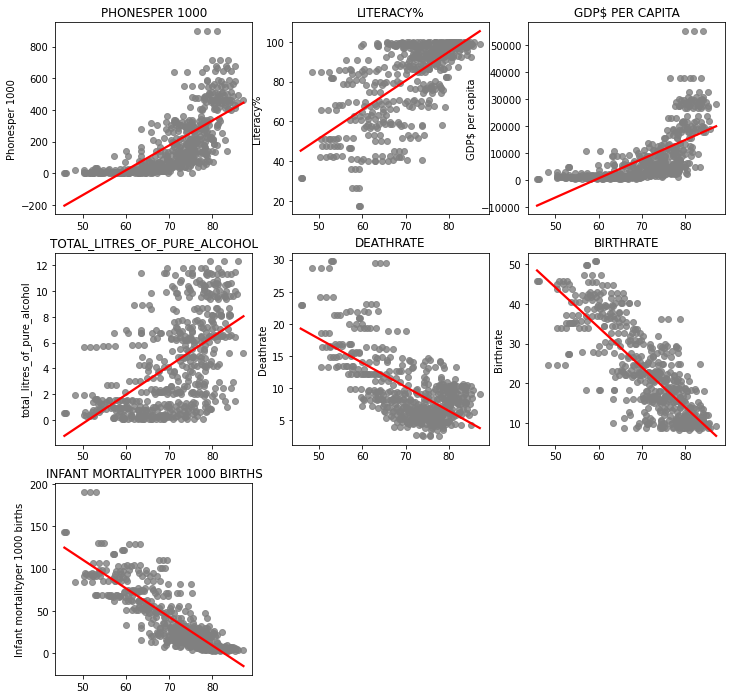

In [81]:
import seaborn as sns

plt.rcParams["figure.figsize"] = (12,12)

for n, i in enumerate(exp_life_corr2.index):
    plt.subplot(3, 3, n+1)
    sns.regplot(df.Numeric, df[i], ci=None, scatter_kws={"color": "grey"}, line_kws={"color": "red"}, )
    plt.title(i.upper())
    plt.xlabel('')
    
plt.show()

We can see, that 'Infant mortalityper 1000 births' and 'Birthrate' are pretty much linearly correlated with life expectancy, however it looks like that as we thought, the correlation for GDP per Capita is not linear:

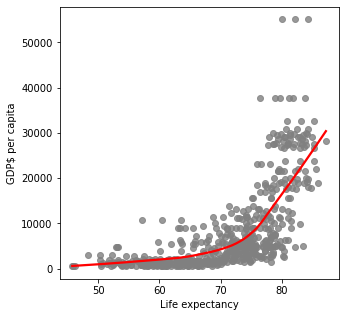

In [82]:
plt.rcParams["figure.figsize"] = (5,5)
sns.regplot(df.Numeric, df['GDP$ per capita'], ci=None,
            lowess = True, scatter_kws={"color": "grey"}, line_kws={"color": "red"})
plt.xlabel('Life expectancy')
plt.show()

### Regions

I find it interesting, that the total alcohol consumption is one of the variables highly correlated with life expectancy. We saw it earlier, that they are positively correlated. One would think, that drinking alcohol, generally thought of as an unhealthy habit, would be negatively correlated with expected lifetime. 
But perhaps it is, to some extent, a proxy value for wealthier countries with better healthcare, so it's safe to say, that countries have higher life expectancy in spite of, not because drinking alcohol.

Let's plot the countries' alcohol consumption and their life expectancy:

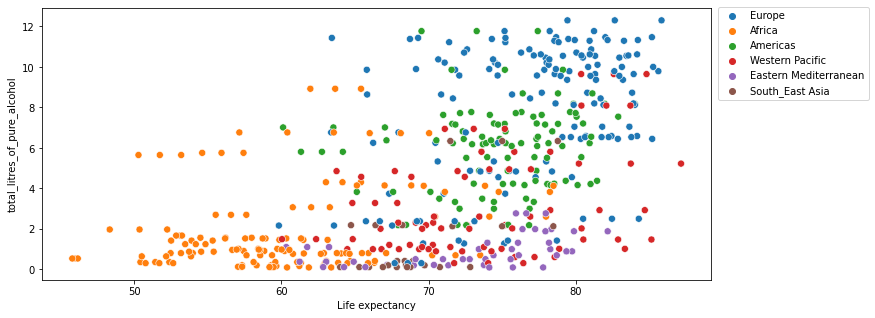

In [83]:
plt.rcParams["figure.figsize"] = (12,5)

import seaborn as sns
sns.scatterplot('Numeric', 'total_litres_of_pure_alcohol', data=df, hue='RegionDisplay', s=50)
plt.legend(loc=(1.01,0.66))
plt.xlabel('Life expectancy')
plt.show()

There is definitely a group of African countries in the bottom left corner of the plot, meanwhile in the top right corner there are mostly European countries. We can also observe the 'Eastern Mediterranean' countries with low alcohol consumption, but higher life expectancies than the African countries. Let's look into the numbers:

In [84]:
alc_reg = df.groupby('RegionDisplay').sum()
alc_reg = alc_reg[['beer_servings', 'spirit_servings', 'wine_servings', 'total_litres_of_pure_alcohol', 'Population']]
alc_reg.Population = pd.to_numeric(((alc_reg.Population/1000000).apply(lambda x: '%.0f' % x)))
alc_reg.rename({'Population':'Population_million'}, axis=1, inplace=True)
#alc_reg.reset_index(inplace=True)
alc_reg

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,Population_million
RegionDisplay,,,,,
Africa,9498.0,2388.0,2484.0,254.3490,2183
Americas,15972.0,15039.0,3786.0,615.9069,2663
Eastern Mediterranean,657.0,1335.0,306.0,40.6746,826
Europe,26856.0,20412.0,18549.0,1164.9609,2620
South_East Asia,489.0,1455.0,15.0,34.6743,4372
Western Pacific,6075.0,4815.0,2226.0,232.1532,5246


In [85]:
(alc_reg.total_litres_of_pure_alcohol / alc_reg.Population_million)

RegionDisplay
Africa                   0.116514
Americas                 0.231283
Eastern Mediterranean    0.049243
Europe                   0.444642
South_East Asia          0.007931
Western Pacific          0.044253
dtype: float64

The table above show the alcohol consumption (in liter) of each region per million people. In Europe, it's almost a half liter, meanwhile in South-East Asia it's less than 10 ml. Let's visualize the difference:

In [86]:
(alc_reg.total_litres_of_pure_alcohol / alc_reg.Population_million).sort_values()

RegionDisplay
South_East Asia          0.007931
Western Pacific          0.044253
Eastern Mediterranean    0.049243
Africa                   0.116514
Americas                 0.231283
Europe                   0.444642
dtype: float64

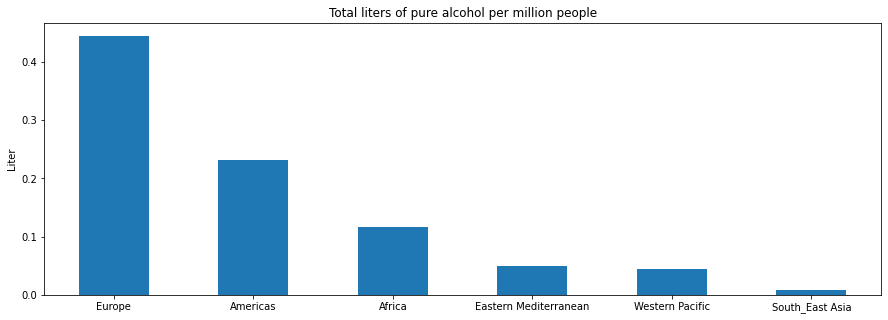

In [87]:
plt.rcParams["figure.figsize"] = (15,5)

(alc_reg.total_litres_of_pure_alcohol / alc_reg.Population_million).sort_values(ascending=False).plot(kind='bar')
plt.title('Total liters of pure alcohol per million people')
plt.xlabel('')
plt.xticks(rotation = 0)
plt.ylabel('Liter')
plt.xticks
plt.show()

Let's check the distribution of the different types of alcohol per region:

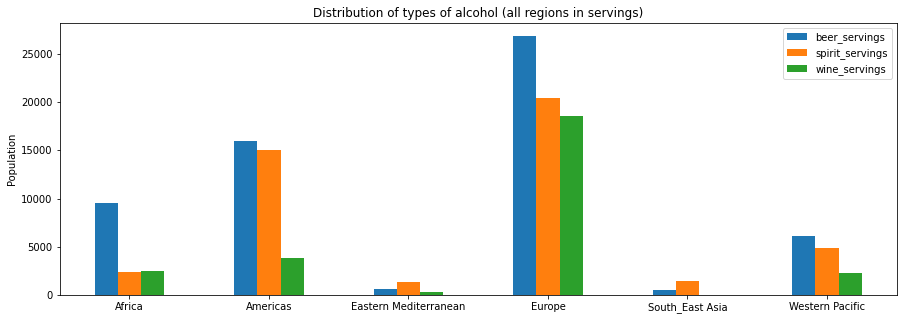

In [88]:
plt.rcParams["figure.figsize"] = (15,5)
alc_reg.iloc[:,0:3].plot(kind='bar')

plt.title('Distribution of types of alcohol (all regions in servings)')
plt.xlabel('')
plt.xticks(rotation = 0)
plt.ylabel('Population')
plt.show()

In [89]:
alc_reg_1 = alc_reg.iloc[:,0:3].reset_index()
alc_reg_1 = pd.melt(alc_reg_1, id_vars='RegionDisplay', value_vars=['beer_servings', 'spirit_servings', 'wine_servings'])

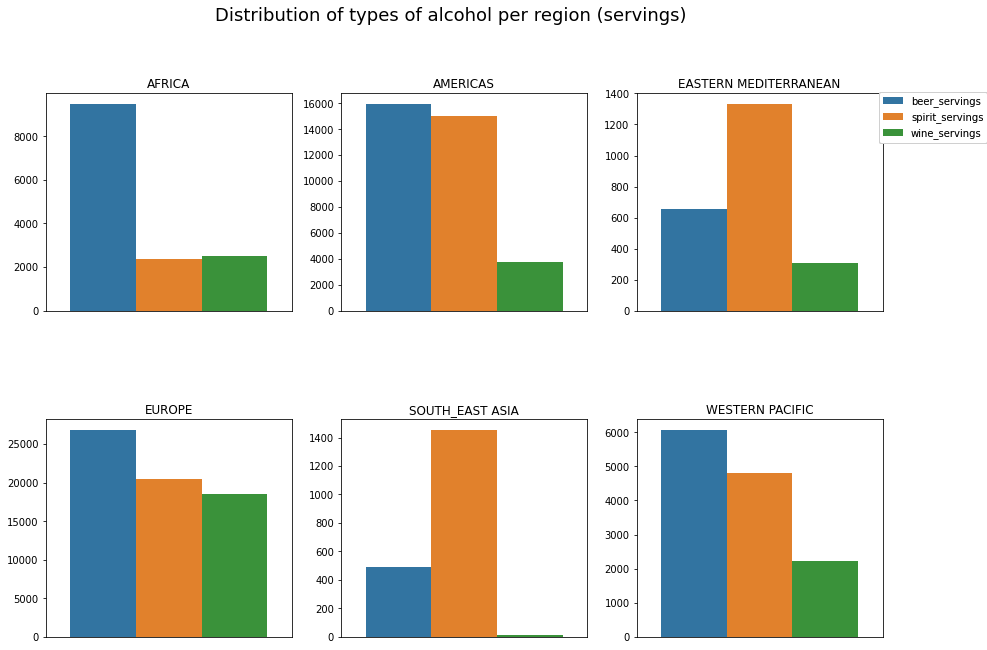

In [90]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Distribution of types of alcohol per region (servings)", fontsize=18, y=1)

for n, ax in zip(alc_reg_1.RegionDisplay, axs.ravel()):
    sns.barplot(data=alc_reg_1[alc_reg_1.RegionDisplay == n], x='RegionDisplay', y='value', hue='variable', ax=ax)
    
    ax.set_title(n.upper())
    ax.get_legend().remove()
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.set_xticks([])
    
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc = (0.89, 0.78), ncol=1)
plt.show()

I find it quite surprising, that in almost all regions, spirits are more popular than wine (wine consumption in South-East Asia is basically non-existent). In South-East Asia and the Eastern Mediterranean, spirits are the most popular drinks.

### The difference between Female and Male life expectancy

Since we have the life expectancy numbers for both sexes, I thought it would be interesting to see, which variables contribute to a larger difference between Female and Male expected lifetime

In [91]:
df1 = df.pivot(index='country', columns='SexDisplay', values='Numeric')
df1['life_exp_diff'] = df1.Female - df1.Male
df1.head()

SexDisplay,Both sexes,Female,Male,life_exp_diff
country,,,,
Albania,74.13000,75.50800,72.82101,2.68699
Algeria,71.82955,73.51464,70.25095,3.26369
Andorra,82.65301,85.83038,79.43845,6.39193
Angola,51.74093,53.19343,50.29145,2.90198
Antigua and Barbuda,75.37800,77.32654,73.43759,3.88895


I decided to calculate the difference without taking the absolute, but my assumption is that women have higher life expectancy. Let's check it:

In [92]:
df1[df1.life_exp_diff < 0]

SexDisplay,Both sexes,Female,Male,life_exp_diff
country,,,,
Mali,57.22025,57.05726,57.33265,-0.27539
Tonga,71.48373,69.56326,73.76161,-4.19835


My assumption was correct, there are only two countries, where males have a higher life expectancy, only one, where the difference is more than a year. So going forward, we can assume, that difference in life expectancy means women live longer.

In [93]:
df2 = df.merge(df1.life_exp_diff, left_on='country', right_on=df1.index)
df2 = df2.groupby('country').first().reset_index()

In [94]:
df2.corr()['life_exp_diff']

beer_servings                      0.420557
spirit_servings                    0.559705
wine_servings                      0.195121
total_litres_of_pure_alcohol       0.521642
YearCode                                NaN
Numeric                            0.404826
Population                        -0.035026
Areasq. mi.                        0.118507
Pop. Densityper sq. mi.            0.003833
Coastlinecoast/area ratio         -0.060181
Net migration                     -0.178771
Infant mortalityper 1000 births   -0.486743
GDP$ per capita                    0.115801
Literacy%                          0.507069
Phonesper 1000                     0.295802
Arable%                            0.273055
Crops%                            -0.086353
Other%                            -0.175610
Birthrate                         -0.554099
Deathrate                         -0.230518
life_exp_diff                      1.000000
Name: life_exp_diff, dtype: float64

Pretty interesting results for the alcohol consumption variables. Spirit consumption shows almost 0.56 correlation with the difference in life expectancy, meaning where spirit consumption is higher, males are expected to live less long on average. As a matter of fact, all types of alcohol consumption have a positive correlation with life expectancy difference, however wine consumption's is significantly less (lower than 0.2). This could mean a couple of things, for example that wine is less harmful, thus people who tend to drink wine, live longer. And it's possible, that these people are more likely to be women. This could also mean, that people who drink wine, don't drink as much alcohol as those who drink spirits and beer. Or perhaps there could be another variable in the background, maybe wine drinkers are less likely to smoke. 

## Summarize the insights, explain the most important factor

First, we analyzed the drinks table. We saw that it is skewed to the right. We removed the observations with missing values, also countries with 0 liters of total alcohol consumption. This last action made the data even more skewed, but I think that overall, it made our analysis more accurate, which I explained in more detail earlier.

After joining the drinks table with the life expectancy table, we checked the correlation between total alcohol consumption and life expectancy. We found out, that the two are positively correlated. This sounds surprising at first, we can make the assumption, that most likely countries with better health care drink more, because of some underlying reason (they are wealthier etc.).

As the next step, we joined the current table with the countries table, containing indicators such as GDP per Capita. At this point, we checked the correlation of life expectancy (the average for both sexes) and the other variables. We filtered for the ones with the highest (linear) correlation. Then we plotted these correlations, some of which looked mostly linear, meanwhile others (based on the plots) had a non-linear relationship with life expectancy.

Then we plotted the expected lifetime and total alcohol consumption - with different colors for each region - and saw some quite well distinguishable groups, to some extent confirming our earlier assumption, about wealthier countries consume more alcohol. We also plotted the alcohol consumption per region, and found that the ratio of different types of alcohols can change significantly from one region to another. We also saw that Europeans drink the most, both in terms of absolute and relative quantities.

Since we had the life expectancy for each sex, we could calculate the difference in expected lifetime for females and males for each country. First we saw, that there were only two countries out of 176, where males had a higher expected lifetime. Then we checked for the factors that can contribute to a larger difference. We found that drinking alcohol, especially spirits and beer, contributes to males having a shorter expected lifetime. Another conclusion we can make, that difference in life expectancy between the sexes is not a particularly good predictor of overall life expectancy.

The main takeaway from this analysis is that the best predictors of life expectancy are Birthrate and Infant mortality per 1000 births, neither of them is a big surprise. Even though total alcohol consumption is one of the better indicators, it's not the best, and we uncovered the potential reasons for its positive correlation with the expected lifetime.